In [3]:
using DelimitedFiles
using Plots
using Statistics
using LinearAlgebra
using CSV, DataFrames
using NPZ

In [2]:
path1="z0.50/BAO/"
path2="z0.50/noBAO/"

"z0.50/noBAO/"

### Save the ratios of bao/nobao

In [7]:
Nfiles = 0  #number of mocks
bkm_nbao = zeros(2600, 1);
bkm_bao = zeros(2600, 1);
bkrm = zeros(2600, 1);
bkr = zeros(2600,922);
k= zeros(2600,3);
for filename1 in readdir(path1)
    if filename1[1:3] == "Bk_" && isfile(string(path2,filename1))
        bk_nbao = readdlm(string(path2,filename1))
        bk_bao = readdlm(string(path1,filename1))
        Nfiles += 1
        bkm_nbao += bk_nbao[:,4]
        bkm_bao += bk_bao[:,4]
        k=bk_bao[:,1:3]
        bkr[:,Nfiles]=bk_bao[:,4]
    end
end
bkrm=bkm_bao./bkm_nbao
bkm_nbao=bkm_nbao/Nfiles
bkr=bkr[:,:]./bkm_nbao[:]
print(Nfiles)
#var=varm(all_Bk,Bkk_mean[:,4]; dims=2, corrected=false);
#covbkkr=cov(all_bkkr ;dims=2,corrected=false);

922

In [8]:
data=Dict([("k",k),("bkrm",bkrm),("bkr",bkr)]);
data
npzwrite("bkr_z0.50.npz", data)

### Save the bao and no_bao separately

In [4]:
path1="z0.50/BAO/"
path2="z0.50/noBAO/"

Nfiles = 0  #number of mocks
bkm_nbao = zeros(2600, 1);
bkm_bao = zeros(2600, 1);
bk_bao = zeros(2600, 922);
bk_nbao = zeros(2600,922);
k= zeros(2600,3);
for filename1 in readdir(path1)
    if filename1[1:3] == "Bk_" && isfile(string(path2,filename1))
        nbao = readdlm(string(path2,filename1))
        bao = readdlm(string(path1,filename1))
        Nfiles += 1
        bkm_nbao += nbao[:,4]
        bkm_bao += bao[:,4]
        k=bao[:,1:3]
        bk_nbao[:,Nfiles]=nbao[:,4]
        bk_bao[:,Nfiles]=bao[:,4]
    end
end
bkm_nbao=bkm_nbao/Nfiles
bkm_bao=bkm_bao/Nfiles
print(Nfiles)
#var=varm(all_Bk,Bkk_mean[:,4]; dims=2, corrected=false);
#covbkkr=cov(all_bkkr ;dims=2,corrected=false);

922

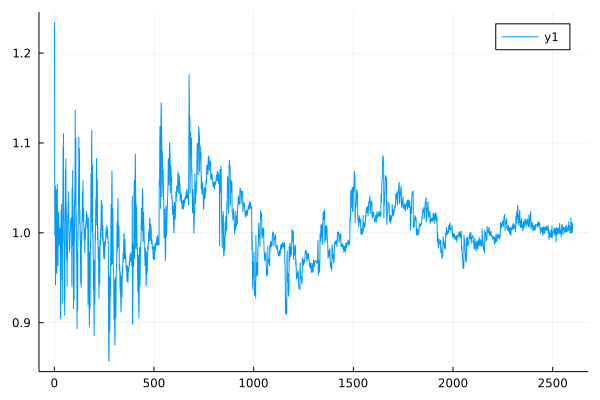

In [8]:
plot(bkm_bao./bkm_nbao)

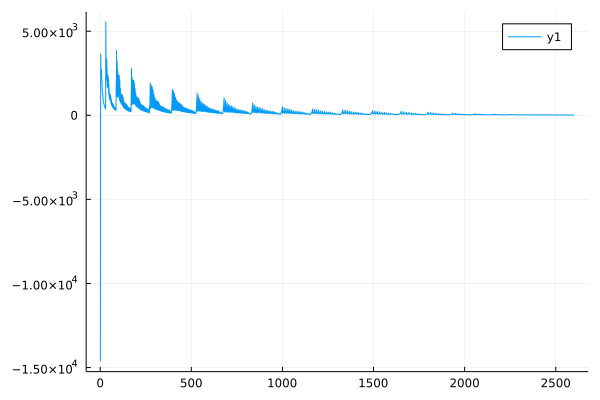

In [9]:
plot(bkm_bao)

In [13]:
data=Dict([("k",k),("bkn",bk_nbao),("bk",bk_bao),("bknm",bkm_nbao),("bkm",bkm_bao)]);
data

Dict{String, Matrix{Float64}} with 5 entries:
  "bkn"  => [-63947.1 -42951.1 … -49826.6 2.20803e5; -35485.1 -1.63062e5 … 6195…
  "bknm" => [-11853.0; -342.589; … ; 12.8505; 12.1498]
  "bkm"  => [-14633.7; -356.754; … ; 12.9175; 12.2732]
  "k"    => [0.005 0.005 0.005; 0.005 0.015 0.015; … ; 0.285 0.295 0.295; 0.295…
  "bk"   => [-35207.7 37500.1 … 232632.0 2.39358e5; -153738.0 -39007.0 … -68180…

In [15]:
npzwrite("bk_z0.50.npz", data)